# Facebook Post Data - Crash Course

In this notebook, you are going to analyse your own posts from Facebook. We will explore your data, do some pre-processing on text data and finally find out, for example, which words gave your the most likes or given some text, how many reaction could you expect. The result will be personal to you, so that will be really interesting.


So, if you didn't do it yet, go to https://github.com/LuxembourgTechSchool/FacebookPostsToCsv and follow the steps. At the end you should have 2 CSV files named `posts_default.csv` and `reactions_default.csv`.

## 1. Importing Libraries

As always, we start but importing a few basic libraries.

In [1]:
# Import Panda and give it a shorter name "pd"
import pandas as pd

# Import numpy and give it a shorter name "np"
import numpy as np

# Import pyplot from matplotlib and give it a shorter name "plt".
import matplotlib.pyplot as plt

# Tell Jupyter to to print plots in the cell results (Specific to notebooks only)
%matplotlib inline 

## 2. Loading the Data

Next, we load our 2 CSV files.

**Important:** Make sure that you set the right path to point to the posts and reactions CSV files.

In [2]:
posts = pd.read_csv('../data/facebook_data/posts_default.csv')
reactions = pd.read_csv('../data/facebook_data/reactions_default.csv')

Let's take a look inside.

In [3]:
# Print the first 10 posts
posts[:10]

,id,created_time,message,story
0,0,2014-10-02T19:11:02+0000,"I add ""Drink Beer"" to my weekend to-do list so...",NaN
1,1,2013-05-05T14:40:24+0000,I asked my North Korean friend how it was ther...,NaN
2,2,2011-09-08T09:51:35+0000,Birth control pills should be for men. It make...,NaN
3,3,2015-06-19T03:45:42+0000,I heard Chipotle is offering a new Ravens burr...,NaN
4,4,2012-01-15T02:18:13+0000,Hello Fire Department? Is this Mr. December? I...,NaN
5,5,2010-11-27T19:58:18+0000,Why does everyone want me to come out of my co...,NaN
6,6,2014-04-27T22:31:36+0000,“Can I pet him or will he bite?” is a fun thin...,NaN
7,7,2012-01-24T05:28:19+0000,I find the best way to get rid of headaches is...,NaN
8,8,2014-02-09T12:01:13+0000,You can tell a lot about a woman's mood by her...,NaN
9,9,2012-05-18T21:06:44+0000,Why aren't lawyers sworn to tell the truth alo...,NaN


In [4]:
print('Size of posts: ', len(posts))

Size of posts:  2000


In [5]:
# Print the first few reactions
reactions.head()

,id,name,type,post
0,b87771f0-b0b8-4126-981e-2ea80a88fd03,Phil Beck,LIKE,0
1,5cd983d1-163d-47c0-a129-77356ea20403,Sophie Busch,HAHA,0
2,54103c8f-6597-45ed-aead-67b1da108305,Jamie Böhm,LIKE,0
3,0a659cce-0eea-471d-ad50-fb079a4575ac,Dieter Zimmermann,LIKE,0
4,cd32bf3e-a69e-4381-87a4-3b63985dab64,Emil Schumacher,LIKE,0


In [6]:
print('Size of reactions: ', len(reactions))

Size of reactions:  102494


## 2.1 Column Descriptions

Starting with Posts, we have the following columns:

- **id:** The unique id of the post.
- **created_time:** The date/time when the posts has been posted.
- **message:** The message of the post.
- **story:** The story of the post (e.g. "John Doe shared a link."). This is different than the message.

Then for the Reactions we have:

- **id:** The unique id of the reaction.
- **name:** The name of the person that reacted to your post.
- **type:** The type of the reaction (LIKE, LOVE, ANGRY, HAHA,...)
- **post:** The id of the post that this reaction is linked to.

Note that some posts might have no reactions at all. We will also find out which one.

# 3. Explore the Data

All right, now let's explore the data a little, extract some information and perform some computations.

## 3.1. How many LIKES, LOVES, HAHA, ANGRY, ...

Let's start simple by counting and exploring how many types of reaction we have.

In [7]:
reactions[:10]

,id,name,type,post
0,b87771f0-b0b8-4126-981e-2ea80a88fd03,Phil Beck,LIKE,0
1,5cd983d1-163d-47c0-a129-77356ea20403,Sophie Busch,HAHA,0
2,54103c8f-6597-45ed-aead-67b1da108305,Jamie Böhm,LIKE,0
3,0a659cce-0eea-471d-ad50-fb079a4575ac,Dieter Zimmermann,LIKE,0
4,cd32bf3e-a69e-4381-87a4-3b63985dab64,Emil Schumacher,LIKE,0
5,98547ac2-b33c-4cc0-aeb0-2ee0b312b740,Mattis Vogt,LIKE,0
6,82f15ce8-41b4-4c69-bf27-aea224abcd7a,Dieter Schäfer,LIKE,0
7,cead0930-0b14-4ba7-8a5e-de605a8d302a,Aaron Jäger,LIKE,0
8,87fd71e7-afa8-46e4-bc1c-78e175e5a56b,Pia Wagner,LIKE,0
9,d8c4b046-d1d7-4641-b9d8-64e3cb561888,Lina Huber,HAHA,0


In [8]:
# here we use numpy where request, which means that it returns all reactions that are equal to "LIKE"
reaction_like = np.where(reactions['type']=='LIKE')

# as "reaction_like" is an array inside the tuple we need to check the lenght of the tuple in index 0
len(reaction_like[0])

67604

In [21]:
# now lets see how many of the reactions are "LOVE"
reaction_like = np.where(reactions['type']=='LOVE')

# as "reaction_like" is an array inside the tuple we need to check the lenght of the tuple in index 0
len(reaction_like[0])

0

In [22]:
# now lets see how many of the reactions are "HAHA"
reaction_like = np.where(reactions['type']=='HAHA')

# as "reaction_like" is an array inside the tuple we need to check the lenght of the tuple in index 0
len(reaction_like[0])

19385

In [23]:
# now lets see how many of the reactions are "ANGRY"
reaction_like = np.where(reactions['type']=='ANGRY')

# as "reaction_like" is an array inside the tuple we need to check the lenght of the tuple in index 0
len(reaction_like[0])

15505

In [24]:
# Print the value_counts of reaction types
reactions['type'].value_counts()

LIKE     67604
HAHA     19385
ANGRY    15505
Name: type, dtype: int64

All right, the numbers are interesting. A plot would be nice too:

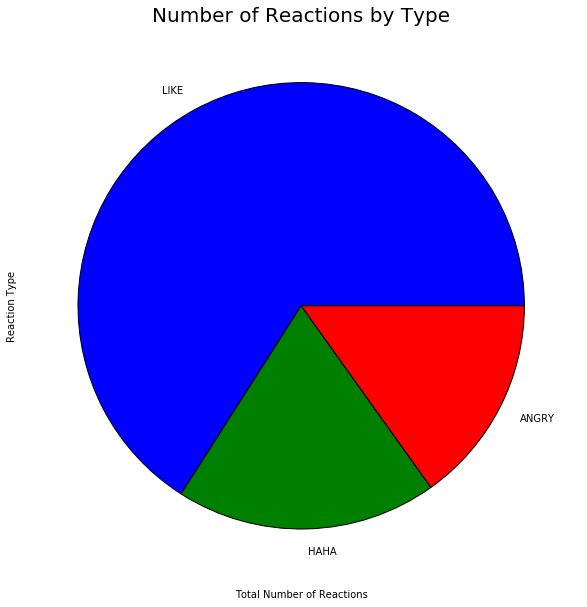

In [25]:
# Define variable data with the reaction value counts of types
data = reactions['type'].value_counts()

# Plot the data as pie
data.plot(kind='pie', figsize=(10,10))

# Set the label on the x-axis
plt.xlabel('Total Number of Reactions')

# Set the label on the y-axis
plt.ylabel('Reaction Type')

# Set the title and font size
plt.title('Number of Reactions by Type', fontsize=20)

# Show the grid
plt.grid(True)

## 3.2. Who is your Biggest Fan?

Let's find out:

- Which friend reacted the most to your posts?
- Which friend likes your posts the most?
- Which friend loves your posts the most?

#### 3.2.1. Which friend reacted the most to your posts

In [26]:
# Easy, let's get the count of rows by name first.
reactions_by_name = reactions['name'].value_counts()
reactions_by_name[:10]

Luca Graf           745
Liam Graf           745
Lina Köhler         739
Phil Otto           737
Jolina Thiele       735
Franziska Kaiser    735
Florian Conrad      730
Mika Ziegler        721
Jonathan Winter     717
Tim Bauer           717
Name: name, dtype: int64

In [27]:
# Print the result
if len(reactions_by_name) > 0:
    max_value = reactions_by_name.max()
    max_name = reactions_by_name.idxmax()
    print('{} reacted the most to your posts with {} reactions.'.format(max_name, max_value))
else:
    print('No one reacted to your posts.')

Luca Graf reacted the most to your posts with 745 reactions.


#### 3.2.2. Which friend likes your posts the most?

In [28]:
likes_by_name = reactions[ reactions['type'] == 'LIKE' ]['name'].value_counts()
likes_by_name[:10]

Phil Beck            611
Julia Schuster       606
Paulina Maier        604
Florian Conrad       600
Benjamin Kraus       595
Malte Schulte        594
Julius Schubert      592
Dieter Zimmermann    579
Anni Möller          578
Jannis Ullrich       577
Name: name, dtype: int64

In [29]:
# Print the result
if len(likes_by_name) > 0:
    max_value = likes_by_name.max()
    max_name = likes_by_name.idxmax()
    print('{} likes your posts {} times.'.format(max_name, max_value))
else:
    print('No one likes your posts.')

Phil Beck likes your posts 611 times.


#### 3.2.3. Which friend loves your posts the most?

In [30]:
loves_by_name = reactions[ reactions['type'] == 'LOVE' ]['name'].value_counts()
loves_by_name[:10]

Series([], Name: name, dtype: int64)

In [31]:
# Print the result
if len(loves_by_name) > 0:
    max_value = loves_by_name.max()
    max_name = loves_by_name.idxmax()
    print('{} likes your posts {} times.'.format(max_name, max_value))
else:
    print('No one loves your posts.')

No one loves your posts.


Great! If you want to find out who reacted the most with ANGRY, HAHA or SAD reactions, you can write the code now or even prepare a function.

In [32]:
# Your turn, try a few things out :)



## 3.3. Did you post things multiple times?

Let's just see if you repost some of your messages. Note that this is not really a duplicate that you need to remove, it is just a message that you posted 2+ times over the years.

In [33]:
print('Number of reposts: {}'.format( posts['message'].duplicated().sum() ))

Number of reposts: 267


In [34]:
# Let's see a few of those messages:

query = posts['message'].duplicated()
posts[ query ][:10]

,id,created_time,message,story
98,98,2016-02-07T17:45:18+0000,I Don't Have a Bad Handwriting. I have my own ...,NaN
114,114,2011-12-17T20:11:07+0000,Law and Order is just Blue's Clues for adults.,NaN
144,144,2016-06-13T14:54:58+0000,FACT: Vampires aren't on Tumblr because they c...,NaN
159,159,2014-07-13T22:21:55+0000,“truth or dare” “Dare” “Order us pizza”,NaN
229,229,2014-01-16T17:15:37+0000,"""It's cute, but it really doesn't go with my o...",NaN
246,246,2016-05-21T14:12:15+0000,"Of all the lies I've told in my life, ""Just ki...",NaN
264,264,2011-11-20T06:27:17+0000,"If you're walking on sunshine, please adjust y...",NaN
274,274,2011-11-01T03:36:30+0000,"""Half a Dozen"", because saying ""six"" was just ...",NaN
288,288,2010-08-21T19:33:52+0000,"I don't blame Congress. If I had $600 billion,...",NaN
325,325,2014-05-21T10:29:56+0000,I wish real life had as many ejection seats as...,NaN


# 4. Pre-Processing

## 4.1. Duplicates

What are duplicates here?

For posts, it would be 2 posts at the same time, with the same message and same ID. From how we get the data, we know it is not really possible. 

Then, removing all posts where the message or story is the same is not a good idea, because, let's say you posted "Happy New Year" every year! That's the same message string but on different dates. So for us, we are going to keep everything.

For scientific reasons, we are still going to print the number of duplicates:

In [35]:
# How many 'full' duplicated rows in posts?
posts.duplicated().sum()

0

In [36]:
# How many 'full' duplicated rows in reactions?
reactions.duplicated().sum()

0

## 4.2. Missing Values

The same is valid here. Because of the method (Facebook API + Script) that we have used to get the data, we know there are no missing values that would not allow us to process a row.

The only detail to remember is that `message` or `story` can be `Nan` (Empty in pandas/numpy). But this is not a big deal, you will see later.

## 4.3. Format Dates

Each post has a datetime column. Since it is a string we are going to convert it into a real Python datetime object and then we are going to extract a few date components.

In [37]:
# First, check the format
posts['created_time'][:5]

0    2014-10-02T19:11:02+0000
1    2013-05-05T14:40:24+0000
2    2011-09-08T09:51:35+0000
3    2015-06-19T03:45:42+0000
4    2012-01-15T02:18:13+0000
Name: created_time, dtype: object

Pandas has a function for working with date/time data. It is explained [here](http://pandas.pydata.org/pandas-docs/version/0.19.1/generated/pandas.to_datetime.html).

It allows us to convert a string to a real `datetime` object representing the date and time. All we have to do is call the method and give it the format of the date/time.

In [38]:
# Month/Day/Year Hours:Minutes/Seconds
datetime_format = '%Y/%m/%dT%H:%M:%S'

What we will do, is just override the 'Date/Time' columns with our new data:

In [39]:
posts['created_time'] = pd.to_datetime( posts['created_time'], format=datetime_format )

In [40]:
# Check again. Note that the dtype has changed.
posts['created_time'][:5]

0   2014-10-02 19:11:02
1   2013-05-05 14:40:24
2   2011-09-08 09:51:35
3   2015-06-19 03:45:42
4   2012-01-15 02:18:13
Name: created_time, dtype: datetime64[ns]

We can now get the desired components and store it in new columns. To create a new column, you can just define it the same way as you would define a key in a dictionary.

This is the power of pandas at work. We don't need to loop. Pandas handle everything for us and fills up every row for our new columns.

In [41]:
posts['DayOfWeekNum'] = posts['created_time'].dt.dayofweek
posts['DayOfWeek']    = posts['created_time'].dt.weekday_name
posts['MonthDayNum']  = posts['created_time'].dt.day
posts['HourOfDay']    = posts['created_time'].dt.hour

In [42]:
# checking what do we have now in our database
posts.head()

,id,created_time,message,story,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
0,0,2014-10-02 19:11:02,"I add ""Drink Beer"" to my weekend to-do list so...",NaN,3,Thursday,2,19
1,1,2013-05-05 14:40:24,I asked my North Korean friend how it was ther...,NaN,6,Sunday,5,14
2,2,2011-09-08 09:51:35,Birth control pills should be for men. It make...,NaN,3,Thursday,8,9
3,3,2015-06-19 03:45:42,I heard Chipotle is offering a new Ravens burr...,NaN,4,Friday,19,3
4,4,2012-01-15 02:18:13,Hello Fire Department? Is this Mr. December? I...,NaN,6,Sunday,15,2


Great, now we are readz to plot some intersting things.

# 5. Advanced Exploration

Let's go ahead and plot the posts per hour and find out what are the times you post the most things.

Then, we are going to see what day of the week you are the most active too.

And at last, we are going to find out, what words can give you the most reactions!

## 5.1. Posts per Hour

To create the plot, we are going to learn about pivot tables. We could achieve something similar with the value_counts() but in this case, it is cleaner with this method. You can read up [here](http://pbpython.com/pandas-pivot-table-explained.html) a really nice introduction.

In [43]:
# Create a pivot table, taking all unique HourOfDay values, and counting the number of messages.
# The aggregate function is count.
post_hour = posts.pivot_table(index=['HourOfDay'],
                                 values='message',
                                 aggfunc='count')

# See the result.
print(post_hour)

HourOfDay
0      79
1      94
2      80
3      78
4      74
5      83
6      77
7     107
8      83
9      95
10     80
11     76
12     88
13     77
14     94
15     73
16     71
17     80
18     82
19     94
20     81
21     71
22     88
23     95
Name: message, dtype: int64


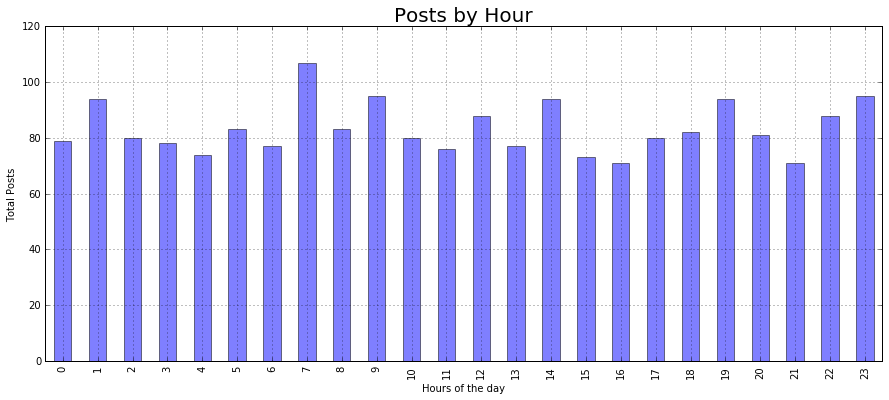

In [44]:
# Let's plot the things

post_hour.plot(kind='bar', figsize=(15,6), alpha=0.5)

# Set the label on the x-axis
plt.xlabel('Hours of the day')

# Set the label on the y-axis
plt.ylabel('Total Posts')

# Set the title and font size
plt.title('Posts by Hour', fontsize=20)

# Show the grid
plt.grid(True)

## 5.2 Posts by Day of Week

We do the same for the day of the week, the steps are the same, first we make the pivot table, then we plot.

In [45]:
# 1. Create the pivot table.
post_weekdays = posts.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                     values='message',
                                     aggfunc='count')

# Note that this time, it is order by DayOfWeekNum, which is prefered for us.
print(post_weekdays)

DayOfWeekNum  DayOfWeek
0             Monday       278
1             Tuesday      296
2             Wednesday    289
3             Thursday     269
4             Friday       291
5             Saturday     303
6             Sunday       274
Name: message, dtype: int64


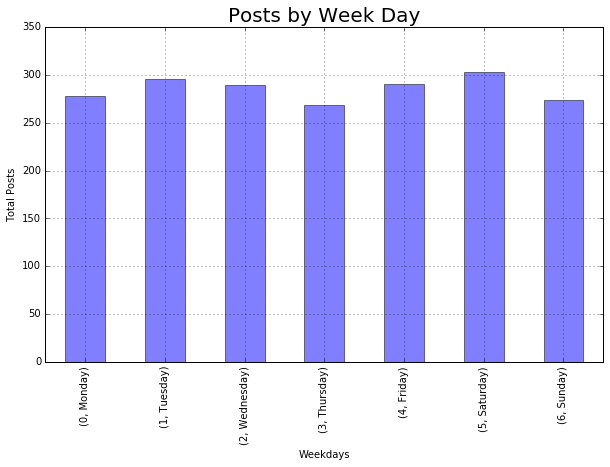

In [46]:
# Let's plot the data at a bar chart. Give the plot a width of 10 and height of 6. Make the bars 50% transparent.
post_weekdays.plot(kind='bar', figsize=(10,6), alpha=0.5)

# Set the label on the x-axis
plt.xlabel('Weekdays')

# Set the label on the y-axis
plt.ylabel('Total Posts')

# Set the title and font size
plt.title('Posts by Week Day', fontsize=20)

# Show the grid
plt.grid(True)

## 5.3. Words That Give The Most Reactions

Now, we are going to find out and maybe predict what words you should be using in your posts in order to generate the most number of reactions. For this we need to do a few things:

1. Posts and Reactions are in 2 seperate files / databases, we need to merge them in some way.
2. Message or Story are long texts, so we need to process the text and, for example, remove all special characters and split by words.

In order words, the goal is to have, for each row, the list of words and the number of reactions, then we could find a way to get a ratio of number of reaction per word for example.

### 5.3.1. Add Number of Reactions to Posts Data

Let's start by counting the number of reactions for each posts and store that value in a new columns, we want to build something like this:

|id|message|n_reactions|n_like|n_haha|...|
|----|----|----|----|----|----|
|1|M1|10|5|5|...|
|2|M2|4|0|2|...|
|3|M3|30|29|2|...|
|4|M4|120|67|29|...|

In [47]:
# First, we can create a pivot table where we index the post and type and use count as aggregate function
reaction_pt = reactions.pivot_table(index=['post'], # We index by Posts
                                     values='name', # This is not important, just a columns that is not named here
                                     aggfunc='count', # Aggregate by counting
                                     columns=['type'], # Make columns by Type
                                     fill_value=0, # Fill up 0 where rows don't have any values
                                     margins=True # Add a column "All" that is the total
                                   )

In [48]:
# The result is exactly what we want
reaction_pt.head(10)

type,ANGRY,HAHA,LIKE,All
post,,,,
0,0.0,7.0,37.0,44.0
1,14.0,4.0,22.0,40.0
2,14.0,8.0,23.0,45.0
3,0.0,6.0,34.0,40.0
4,43.0,13.0,56.0,112.0
5,0.0,17.0,51.0,68.0
6,0.0,13.0,42.0,55.0
7,22.0,15.0,33.0,70.0
8,16.0,12.0,21.0,49.0


All right, we are nearly done with this pre-processing. Now we are going to be a little creative.

We will create the new columns `n_reactions`, `n_like`, `n_haha` and `n_angry` by using the `apply()` function.
So, we are going to define a function that will get the reaction from the `reaction_pt` pivot table based on the post_id. If the post has no reactions, meaning, it is not in the table, then we just add 0.

**Important:** This is very little code but it is doing a loooot, so take the time to really understand every parts.

In [49]:
# Example: This is how you get the item by the index.
print('Item at index 0:', reaction_pt.loc[0])
print('Reaction LIKE for item at index 0:', reaction_pt.loc[0]['LIKE'])

Item at index 0: type
ANGRY     0.0
HAHA      7.0
LIKE     37.0
All      44.0
Name: 0, dtype: float64
Reaction LIKE for item at index 0: 37.0


In [50]:
# We define our function:
def get_reaction(post_id, reaction):
    ''' Get the reaction for the post id from the reactions pivot table.
    Return 0 if post_id is not found.
    '''
    try:
        return reaction_pt.loc[post_id][reaction]
    except:
        return 0

In [51]:
# We call our function in the apply using a lambda expression, x is the post_id

print('Processing n_reactions...')
posts['n_reactions'] = posts['id'].apply( lambda x : get_reaction(x, 'All') )

print('Processing n_like...')
posts['n_like'] = posts['id'].apply( lambda x : get_reaction(x, 'LIKE') )

print('Processing n_love...')
posts['n_love'] = posts['id'].apply( lambda x : get_reaction(x, 'LOVE') )

print('Processing n_haha...')
posts['n_haha'] = posts['id'].apply( lambda x : get_reaction(x, 'HAHA') )

print('Processing n_sad...')
posts['n_sad'] = posts['id'].apply( lambda x : get_reaction(x, 'SAD') )

print('Processing n_wow...')
posts['n_wow'] = posts['id'].apply( lambda x : get_reaction(x, 'WOW') )

print('Processing n_angry...')
posts['n_angry'] = posts['id'].apply( lambda x : get_reaction(x, 'ANGRY') )

print('All Done.')

Processing n_reactions...
Processing n_like...
Processing n_love...
Processing n_haha...
Processing n_sad...
Processing n_wow...
Processing n_angry...
All Done.


In [52]:
# Print the first 10 posts
posts[:10]

,id,created_time,message,story,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,n_reactions,n_like,n_love,n_haha,n_sad,n_wow,n_angry
0,0,2014-10-02 19:11:02,"I add ""Drink Beer"" to my weekend to-do list so...",NaN,3,Thursday,2,19,44.0,37.0,0,7.0,0,0,0.0
1,1,2013-05-05 14:40:24,I asked my North Korean friend how it was ther...,NaN,6,Sunday,5,14,40.0,22.0,0,4.0,0,0,14.0
2,2,2011-09-08 09:51:35,Birth control pills should be for men. It make...,NaN,3,Thursday,8,9,45.0,23.0,0,8.0,0,0,14.0
3,3,2015-06-19 03:45:42,I heard Chipotle is offering a new Ravens burr...,NaN,4,Friday,19,3,40.0,34.0,0,6.0,0,0,0.0
4,4,2012-01-15 02:18:13,Hello Fire Department? Is this Mr. December? I...,NaN,6,Sunday,15,2,112.0,56.0,0,13.0,0,0,43.0
5,5,2010-11-27 19:58:18,Why does everyone want me to come out of my co...,NaN,5,Saturday,27,19,68.0,51.0,0,17.0,0,0,0.0
6,6,2014-04-27 22:31:36,“Can I pet him or will he bite?” is a fun thin...,NaN,6,Sunday,27,22,55.0,42.0,0,13.0,0,0,0.0
7,7,2012-01-24 05:28:19,I find the best way to get rid of headaches is...,NaN,1,Tuesday,24,5,70.0,33.0,0,15.0,0,0,22.0
8,8,2014-02-09 12:01:13,You can tell a lot about a woman's mood by her...,NaN,6,Sunday,9,12,49.0,21.0,0,12.0,0,0,16.0
9,9,2012-05-18 21:06:44,Why aren't lawyers sworn to tell the truth alo...,NaN,4,Friday,18,21,24.0,21.0,0,3.0,0,0,0.0


Great! Ready for the next step.

### 5.3.2. Text-Processing on Message Column

All right, to be able to work with the message column, which is just text, we must process it. In simple Big Data analytics, this often means that we start by splitting the text into a list of words, getting rid of everything we don't need such as special symbols and stop words.

Why? So that we are able to map specific words to, for example, the number of likes. 

Does talking about your dog or cat gives you more like than complaining about Mondays? 

Then, based on a new message, how many likes could you expect? This is the kind of analysis that we can do, once the text data is transformed.

I recommend that you also read [this tutorial](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words). It's a beginner introduction to text analysis techniques. We are going to use certain aspect explained there.

In [53]:
# Looking at messages
posts['message'][:10]

0    I add "Drink Beer" to my weekend to-do list so...
1    I asked my North Korean friend how it was ther...
2    Birth control pills should be for men. It make...
3    I heard Chipotle is offering a new Ravens burr...
4    Hello Fire Department? Is this Mr. December? I...
5    Why does everyone want me to come out of my co...
6    “Can I pet him or will he bite?” is a fun thin...
7    I find the best way to get rid of headaches is...
8    You can tell a lot about a woman's mood by her...
9    Why aren't lawyers sworn to tell the truth alo...
Name: message, dtype: object

From the exploration we know that sometimes the message is `NaN` when story is not. For us, we are going to replace all `NaN` with en empty string `""`. What is in the story we are going to ignore it for now, feel free to work on that part for yourself.

In [54]:
# Replace all NaN with empty string ""
# fillna() return a DataFrame, where all the NaN values has been replaced with another value given
posts['message'] = posts['message'].fillna("")

Now, we are going to demonstrate each step of the process and then use a function that performs each step for every row.

**Steps:**

1. Remove certain special symbols.
1. Lowercase everthing.
1. Split by words.
1. Remove english stop words (a, an, is, of, ...)
1. Save the result as a simplified paragraph "word1 word2 word3 ..."

Let's get to work:

In [55]:
# We will just use the first message:
posts['message'].loc[0]

'I add "Drink Beer" to my weekend to-do list so I know I\'ll at least get one thing done.'

In [56]:
# 1. Remove certain special symbols and replace by a space.
import re
result = re.sub("[.,\[\]{}|\`~\'\"*&^%$@!?+>\-\_]", " ", posts['message'].loc[0])

result

'I add  Drink Beer  to my weekend to do list so I know I ll at least get one thing done '

In [57]:
# 2. Lowercase everthing.
result = result.lower()

result

'i add  drink beer  to my weekend to do list so i know i ll at least get one thing done '

In [58]:
# 3. Split by words
result = result.split()

result

['i',
 'add',
 'drink',
 'beer',
 'to',
 'my',
 'weekend',
 'to',
 'do',
 'list',
 'so',
 'i',
 'know',
 'i',
 'll',
 'at',
 'least',
 'get',
 'one',
 'thing',
 'done']

In [3]:
# 4. Remove English stop words

# Import NLTK and download the required corpus

import nltk

In [ ]:
# Only run once for downloading the required corpus
nltk.download()

In [ ]:
# IF `nltk.download()` DID NOT WORK, YOU CAN USE THIS:
english_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']
german_stopwords = ['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euch', 'im', 'in', 'indem', 'ins', 'ist', 'jede', 'jedem', 'jeden', 'jeder', 'jedes', 'jene', 'jenem', 'jenen', 'jener', 'jenes', 'jetzt', 'kann', 'kein', 'keine', 'keinem', 'keinen', 'keiner', 'keines', 'können', 'könnte', 'machen', 'man', 'manche', 'manchem', 'manchen', 'mancher', 'manches', 'mein', 'meine', 'meinem', 'meinen', 'meiner', 'meines', 'mit', 'muss', 'musste', 'nach', 'nicht', 'nichts', 'noch', 'nun', 'nur', 'ob', 'oder', 'ohne', 'sehr', 'sein', 'seine', 'seinem', 'seinen', 'seiner', 'seines', 'selbst', 'sich', 'sie', 'ihnen', 'sind', 'so', 'solche', 'solchem', 'solchen', 'solcher', 'solches', 'soll', 'sollte', 'sondern', 'sonst', 'über', 'um', 'und', 'uns', 'unsere', 'unserem', 'unseren', 'unser', 'unseres', 'unter', 'viel', 'vom', 'von', 'vor', 'während', 'war', 'waren', 'warst', 'was', 'weg', 'weil', 'weiter', 'welche', 'welchem', 'welchen', 'welcher', 'welches', 'wenn', 'werde', 'werden', 'wie', 'wieder', 'will', 'wir', 'wird', 'wirst', 'wo', 'wollen', 'wollte', 'würde', 'würden', 'zu', 'zum', 'zur', 'zwar', 'zwischen']
french_stopwords = ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aurez', 'auront', 'aurais', 'aurait', 'aurions', 'auriez', 'auraient', 'avais', 'avait', 'avions', 'aviez', 'avaient', 'eut', 'eûmes', 'eûtes', 'eurent', 'aie', 'aies', 'ait', 'ayons', 'ayez', 'aient', 'eusse', 'eusses', 'eût', 'eussions', 'eussiez', 'eussent']

In [59]:
# Import the predefined stopwords

from nltk.corpus import stopwords

english_stopwords = stopwords.words("english")
german_stopwords = stopwords.words("german")
french_stopwords = stopwords.words("french")

print('\nEnglish Stop Words:')
print( english_stopwords )

print('\German Stop Words:')
print( german_stopwords )

print('\nFrench Stop Words:')
print( french_stopwords )


English Stop Words:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',

In [60]:
# Remove all elements in the list that are english stopwords
result = [w for w in result if not w in english_stopwords]
print(result)

['add', 'drink', 'beer', 'weekend', 'list', 'know', 'least', 'get', 'one', 'thing', 'done']


Great! Note that we make use of many built-in libraries inside Anaconda and that for text processing those techniques can easily be applied to any text that you have. So keep those methods close to you so that you can copy and paste the functions you need.

Now let's make a function that will do all those steps and then apply it to every row:

In [61]:
import re

def process_text(raw_text):
    # 1. Remove certain special symbols and replace by a space.
    text = re.sub("[.,\[\]{}|\`~\'\"“”’*&^%$@!?+>\-\_]", " ", raw_text)

    # 2. Lowercase
    text = text.lower()
    
    # 3. Split by words
    words = text.split()
    
    # 4. Remove English stop words
    
    # Sets are much faster than lists in Python for membership comparisons
    stops = set(english_stopwords)
    
    meaningful_words = [w for w in words if not w in stops]
    
    # 5. Return the words concantenated with eachother
    return( " ".join( meaningful_words ))

In [62]:
# Let's try the method for multiple inputs:
for message in posts['message'][:30]:
    print('- ' + process_text(message) )

- add drink beer weekend list know least get one thing done
- asked north korean friend said complain
- birth control pills men makes much sense unload gun shoot bulletproof vest
- heard chipotle offering new ravens burrito everything rice
- hello fire department mr december stuck tree mean meow
- everyone want come comfort zone worked really hard get
- pet bite fun thing ask parents keep kid leash
- find best way get rid headaches send either rooms outside play
- tell lot woman mood hands instance holding gun probably angry
- lawyers sworn tell truth along everyone else proceedings
- believe love something let go never let hold baby
- interest fighting childhood obesity epidemic decided eat halloween candy bought
- funny head shoulders becomes head shoulders knees toes run body wash
- hate someone answers questions
- hate people weirdly spelled common names get mad misspell name misspell parents
- spiders web developers happy find bugs
- agreed wrong
- nothing beats good drum solo ste

In [63]:
# Now we can apply it to every row and store it in a new column
posts['processed_message'] = posts['message'].apply( lambda x : process_text(x) )

In [64]:
# And Tadaaaaa
posts[['message','processed_message', 'n_reactions']][:20]

,message,processed_message,n_reactions
0,"I add ""Drink Beer"" to my weekend to-do list so...",add drink beer weekend list know least get one...,44.0
1,I asked my North Korean friend how it was ther...,asked north korean friend said complain,40.0
2,Birth control pills should be for men. It make...,birth control pills men makes much sense unloa...,45.0
3,I heard Chipotle is offering a new Ravens burr...,heard chipotle offering new ravens burrito eve...,40.0
4,Hello Fire Department? Is this Mr. December? I...,hello fire department mr december stuck tree m...,112.0
5,Why does everyone want me to come out of my co...,everyone want come comfort zone worked really ...,68.0
6,“Can I pet him or will he bite?” is a fun thin...,pet bite fun thing ask parents keep kid leash,55.0
7,I find the best way to get rid of headaches is...,find best way get rid headaches send either ro...,70.0
8,You can tell a lot about a woman's mood by her...,tell lot woman mood hands instance holding gun...,49.0
9,Why aren't lawyers sworn to tell the truth alo...,lawyers sworn tell truth along everyone else p...,24.0


Now, let's loop over all rows, take each word of the `processed_message` column and create a new dictionary where each word is a key and the value is the sum of the number of reactions.

In [65]:
# Define empty dictionary
word_reaction = {}

# Define function that will process one processed_message
def handle_processed_message(message, n_reactions):
    # Split by space
    words = message.split()
    
    # Loop over words and add n_reactions to the dictionary
    for word in words:
        # If the word is already know, add
        if word in word_reaction:
            word_reaction[word] += n_reactions
        else: # Otherwise intialise
            word_reaction[word] = n_reactions
            
print('Starting...')
# Call the method for each row:
posts.apply(lambda row : handle_processed_message(row['processed_message'], row['n_reactions']), axis=1)

print('Done')

Starting...
Done


In [66]:
# See the dictionary
word_reaction

{'knows': 363.0,
 'cancel': 49.0,
 'sworn': 49.0,
 'cia': 86.0,
 'crying': 218.0,
 'dealership': 169.0,
 'forest': 250.0,
 'bluetooth': 15.0,
 'plenty': 151.0,
 'country': 207.0,
 'overly': 29.0,
 'lozenges': 40.0,
 'vampires': 230.0,
 'surprises': 36.0,
 'forgot': 290.0,
 'seeing': 375.0,
 'known': 98.0,
 'laziness': 21.0,
 'check': 395.0,
 'use': 1413.0,
 'somewhere': 238.0,
 'studies': 52.0,
 'heck': 167.0,
 'ordered': 248.0,
 'cashew': 38.0,
 'pictures': 258.0,
 'persistent': 82.0,
 'workweek': 17.0,
 'her:': 79.0,
 'ex': 679.0,
 'sugar': 240.0,
 'brave': 206.0,
 '20': 738.0,
 'peanuts': 21.0,
 'sleeping': 496.0,
 'catnip': 30.0,
 'serve': 143.0,
 'abc': 15.0,
 'wanna': 133.0,
 'loss': 63.0,
 'much': 1905.0,
 'lid': 80.0,
 'merge': 80.0,
 'writing': 261.0,
 'mechanic': 80.0,
 'candlestick': 45.0,
 'blew': 55.0,
 'neighborhood': 43.0,
 'trouble': 432.0,
 'motorcycle': 36.0,
 'labeled': 264.0,
 'cook': 110.0,
 'dinosaurs': 129.0,
 'hug': 185.0,
 'attention': 327.0,
 'nonchalantly': 1

In [67]:
# Convert to Serie
word_reaction = pd.Series(word_reaction)

# Sort from Big to Small
word_reaction.sort(ascending=False)

/Users/ralphmarschall/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [68]:
# Take a look at the 10 best
word_reaction[:10]

like      10622.0
people     8780.0
get        6793.0
would      5789.0
one        5198.0
think      4913.0
going      4712.0
know       4683.0
never      4492.0
time       4437.0
dtype: float64

In [69]:
# Take a look at the 10 worst
word_reaction[-10:]

arrest         1.0
stiff          1.0
diets          0.0
passengers     0.0
grandfather    0.0
understood     0.0
peacefully     0.0
cents          0.0
tank           0.0
19             0.0
dtype: float64

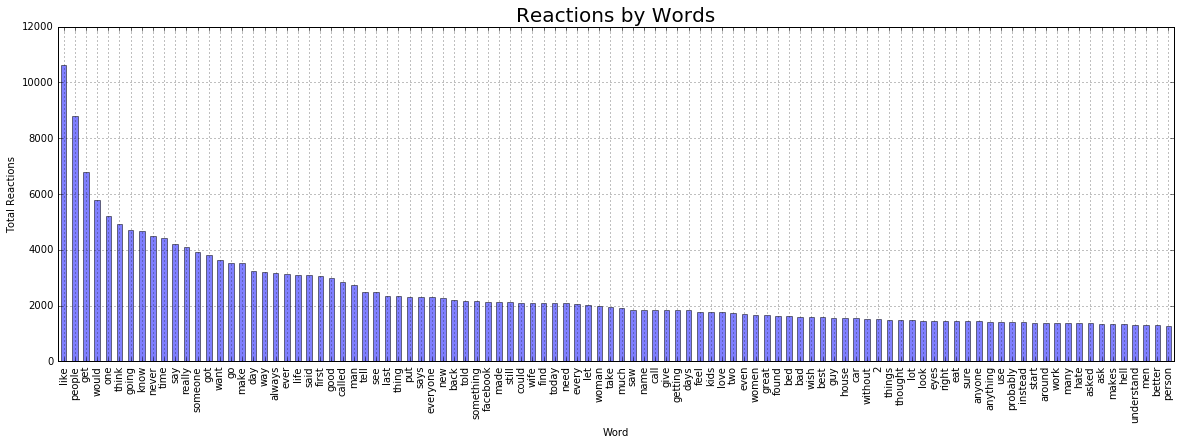

In [70]:
# Plot the 100 best words

# Let's plot the data at a bar chart.
# Make sure that the plot is big enough and DO NOT plot everything, just select a subset, because otherwise it
# will be unreadable
word_reaction[:100].plot(kind='bar', figsize=(20,6), alpha=0.5)

# Set the label on the x-axis
plt.xlabel('Word')

# Set the label on the y-axis
plt.ylabel('Total Reactions')

# Set the title and font size
plt.title('Reactions by Words', fontsize=20)

# Show the grid
plt.grid(True)

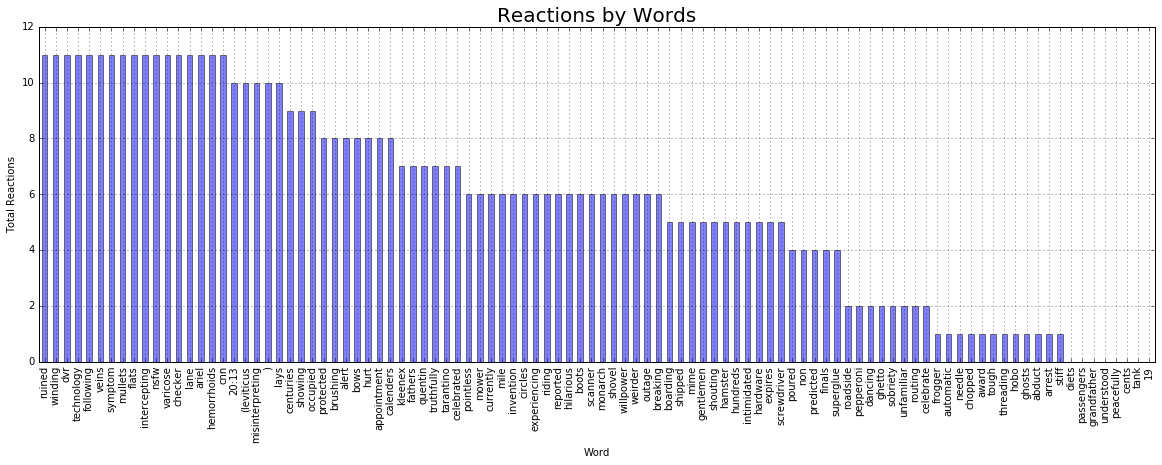

In [71]:
# Plot the 100 worst words

# Let's plot the data at a bar chart.
# Make sure that the plot is big enough and DO NOT plot everything, just select a subset, because otherwise it
# will be unreadable
word_reaction[-100:].plot(kind='bar', figsize=(20,6), alpha=0.5)

# Set the label on the x-axis
plt.xlabel('Word')

# Set the label on the y-axis
plt.ylabel('Total Reactions')

# Set the title and font size
plt.title('Reactions by Words', fontsize=20)

# Show the grid
plt.grid(True)